In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import tensorflow as tf
from tensorflow import keras
from keras import layers
from  keras import Sequential

In [2]:
# import splitfolders
# splitfolders.ratio('Indian', output="output", seed=1337, ratio=(.8, 0.1,0.1))

In [3]:
img_width=180
img_height=180

In [4]:
train_path =r'C:\Users\Siyag\OneDrive\Desktop\New folder\DL PROJECT\output\train'
test_path=r'C:\Users\Siyag\OneDrive\Desktop\New folder\DL PROJECT\output\test'
val_path=r'C:\Users\Siyag\OneDrive\Desktop\New folder\DL PROJECT\output\val'

In [5]:
data_train= tf.keras.utils.image_dataset_from_directory(
    train_path,#path of folder
    shuffle=True,#its wike random state 
    image_size=(img_width,img_height),#image dimensions 
    batch_size=32,
    validation_split=False
)

Found 34190 files belonging to 35 classes.


In [6]:
data_val= tf.keras.utils.image_dataset_from_directory(
    val_path,
    shuffle=False,
    image_size=(img_width,img_height),
    batch_size=32,
    validation_split=False #we alreay have validation data set hence no need to split it again
)

Found 4271 files belonging to 35 classes.


In [7]:
data_test= tf.keras.utils.image_dataset_from_directory(
    test_path,
    shuffle=False,
    image_size=(img_width,img_height),
    batch_size=32,
    validation_split=False
)

Found 4278 files belonging to 35 classes.


In [8]:
data_cat=data_train.class_names

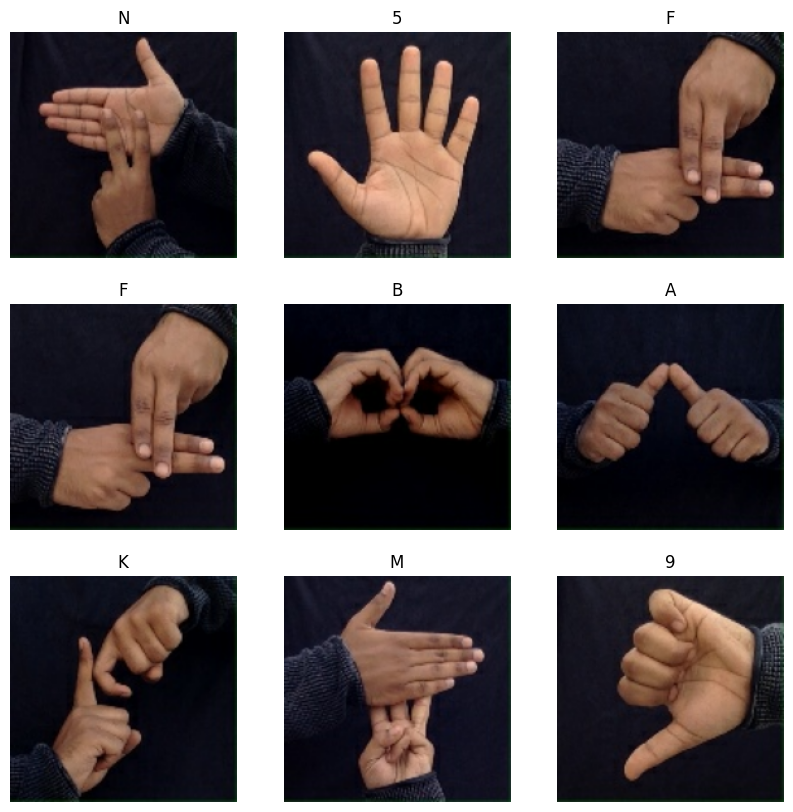

In [9]:
plt.figure(figsize=(10,10))
for image ,lables in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)#formation of grid  3*3 image matrix
        plt.imshow(image[i].numpy().astype('uint8'))#imshow helps to display images
        plt.title(data_cat[lables[i]])#fetching the titles from previously form lables list
        plt.axis('off')#hides the axix

In [10]:
data_train


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [11]:
model= Sequential([
    layers.Rescaling(1./255),#getting color in the specified range
    layers.Conv2D(16,3,padding='same',activation='relu'),
    #will convert the (180,180,3)in single ,16 is number of neyrons in a layer
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
])  

In [12]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [13]:

epochs_size=30
history= model.fit(data_train,validation_data=data_val,epochs=epochs_size,batch_size=32,verbose=1)

Epoch 1/30




1069/1069 [==============================] - 171s 158ms/step - loss: 0.0444 - accuracy: 0.9902 - val_loss: 3.3984e-04 - val_accuracy: 0.9998
Epoch 2/30
1069/1069 [==============================] - 171s 160ms/step - loss: 0.0146 - accuracy: 0.9970 - val_loss: 0.0098 - val_accuracy: 0.9960
Epoch 3/30
1069/1069 [==============================] - 187s 175ms/step - loss: 0.0010 - accuracy: 0.9998 - val_loss: 5.9256e-05 - val_accuracy: 1.0000
Epoch 4/30
1069/1069 [==============================] - 192s 179ms/step - loss: 6.4275e-06 - accuracy: 1.0000 - val_loss: 6.7498e-05 - val_accuracy: 1.0000
Epoch 5/30
1069/1069 [==============================] - 194s 181ms/step - loss: 3.8279e-06 - accuracy: 1.0000 - val_loss: 6.8845e-05 - val_accuracy: 1.0000
Epoch 6/30
1069/1069 [==============================] - 184s 172ms/step - loss: 9.3533e-07 - accuracy: 1.0000 - val_loss: 9.8858e-05 - val_accuracy: 1.0000
Epoch 7/30
1069/1069 [==============================] - 181s 169ms/step - loss: 4.8191e-0

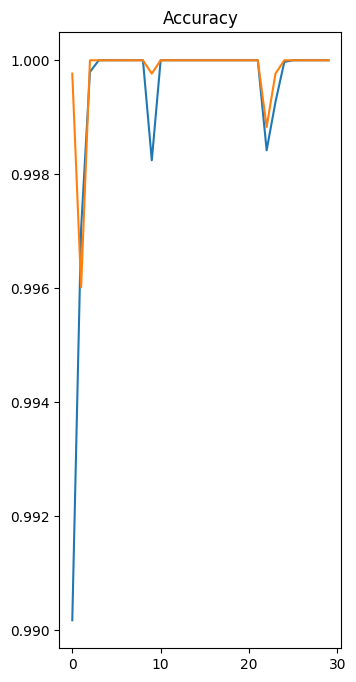

Text(0.5, 1.0, 'Loss')

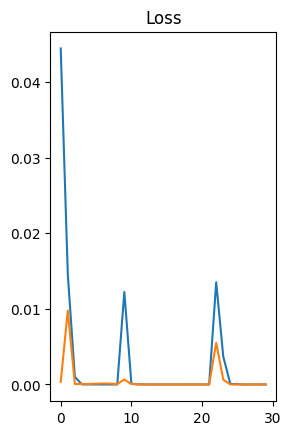

In [14]:
epochs_range =range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['accuracy'],label='Training Accuracy')
plt.plot(epochs_range,history.history['val_accuracy'],label='Validation Accuracy')
plt.title('Accuracy')
plt.show()

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label='Training loss')
plt.plot(epochs_range,history.history['val_loss'],label='Validation loss')
plt.title('Loss')

In [15]:
image = 'test1.jpg'
image =tf.keras.utils.load_img(image,target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [16]:
predict = model.predict(img_bat)

1/1 [==============================] - 1s 1s/step


In [18]:
score=tf.nn.softmax(predict)

In [19]:
print('Alphabet in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Aplthabet in image is G with accuracy of 100.00
